In [18]:
from __future__ import absolute_import, division, print_function

import random
import pathlib
import tensorflow as tf
import IPython.display as display

tf.enable_eager_execution()
tf.VERSION

'1.14.1-dev20190313'

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
data_root = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)
data_root = pathlib.Path(data_root)
print(data_root)

/home/maksym/.keras/datasets/flower_photos


In [4]:
for item in data_root.iterdir():
  print(item)

/home/maksym/.keras/datasets/flower_photos/dandelion
/home/maksym/.keras/datasets/flower_photos/roses
/home/maksym/.keras/datasets/flower_photos/LICENSE.txt
/home/maksym/.keras/datasets/flower_photos/sunflowers
/home/maksym/.keras/datasets/flower_photos/tulips
/home/maksym/.keras/datasets/flower_photos/daisy


In [5]:
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [6]:
all_image_paths[:10]

['/home/maksym/.keras/datasets/flower_photos/tulips/15082212714_ff87e8fcb1_m.jpg',
 '/home/maksym/.keras/datasets/flower_photos/sunflowers/3311874685_7b9ef10f7e_m.jpg',
 '/home/maksym/.keras/datasets/flower_photos/tulips/8677713853_1312f65e71.jpg',
 '/home/maksym/.keras/datasets/flower_photos/sunflowers/20777375650_ef854bf645.jpg',
 '/home/maksym/.keras/datasets/flower_photos/dandelion/8681420404_6ae114f036_n.jpg',
 '/home/maksym/.keras/datasets/flower_photos/tulips/12916135413_dafcf3089e_n.jpg',
 '/home/maksym/.keras/datasets/flower_photos/tulips/8605564823_7a59d3d92a.jpg',
 '/home/maksym/.keras/datasets/flower_photos/dandelion/8747223572_dcd9601e99.jpg',
 '/home/maksym/.keras/datasets/flower_photos/roses/488849503_63a290a8c2_m.jpg',
 '/home/maksym/.keras/datasets/flower_photos/roses/4279990882_031482f8b6_n.jpg']

In [8]:
attributions = (data_root/"LICENSE.txt").read_text(encoding="utf8").splitlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [9]:
def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

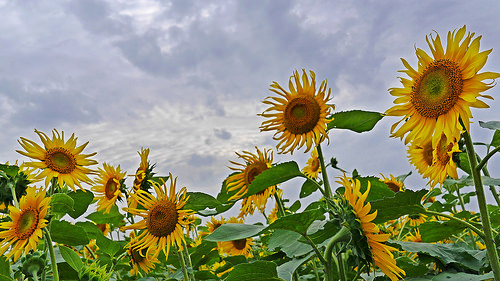

In [10]:
image_path = random.choice(all_image_paths)
display.display(display.Image(image_path))

In [12]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [13]:
label_to_index = dict((name, index) for index, name  in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [14]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels in indices: ", all_image_labels[:10])

First 10 labels in indices:  [4, 3, 4, 3, 1, 4, 4, 1, 2, 2]


In [15]:
img_path = all_image_paths[0]
img_path

'/home/maksym/.keras/datasets/flower_photos/tulips/15082212714_ff87e8fcb1_m.jpg'

In [16]:
img_raw = tf.read_file(img_path)
print(repr(img_raw)[:100]+'...')

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [17]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(240, 186, 3)
<dtype: 'uint8'>


In [20]:
img_final = tf.image.resize_images(img_tensor, [224, 224])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(224, 224, 3)
0.0
1.0


In [21]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize_images(img_tensor, [224, 224])
    image /= 255.0
    
    return image

def load_and_preprocess_image(path):
    image = tf.read_file(path)
    return preprocess_image(image)

In [23]:
%matplotlib
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

Using matplotlib backend: TkAgg



In [ ]:
# Build a tf.data.Dataset